In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

METRICS = ['accuracy', 'precision', 'recall', 'f1']

In [2]:
df = []

df.append(pd.read_csv('../../out/csv/t5-base_metrics_4.csv'))
df[0]['model'] = 't5-base'
df.append(pd.read_csv('../../out/csv/t5_metrics_4.csv'))
df[1]['model'] = 't5-small'

df = pd.concat(df)
df.rename(columns={'week': 'ds'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.date
df = df[df['ds'] >= pd.to_datetime('2023-05-07').date()]

df

,accuracy,precision,recall,f1,ds,model
1,0.514286,0.514286,1.000000,0.679245,2023-05-07,t5-base
2,0.746575,0.703125,0.714286,0.708661,2023-05-14,t5-base
3,0.568182,0.646667,0.613924,0.629870,2023-05-21,t5-base
4,0.738636,0.834646,0.688312,0.754448,2023-05-28,t5-base
5,0.768939,0.753333,0.824818,0.787456,2023-06-04,t5-base
6,0.814394,0.784722,0.862595,0.821818,2023-06-11,t5-base
7,0.795455,0.782946,0.795276,0.789062,2023-06-18,t5-base
8,0.844697,0.927928,0.757353,0.834008,2023-06-25,t5-base
9,0.864964,0.873134,0.854015,0.863469,2023-07-02,t5-base
10,0.824818,0.796875,0.822581,0.809524,2023-07-09,t5-base


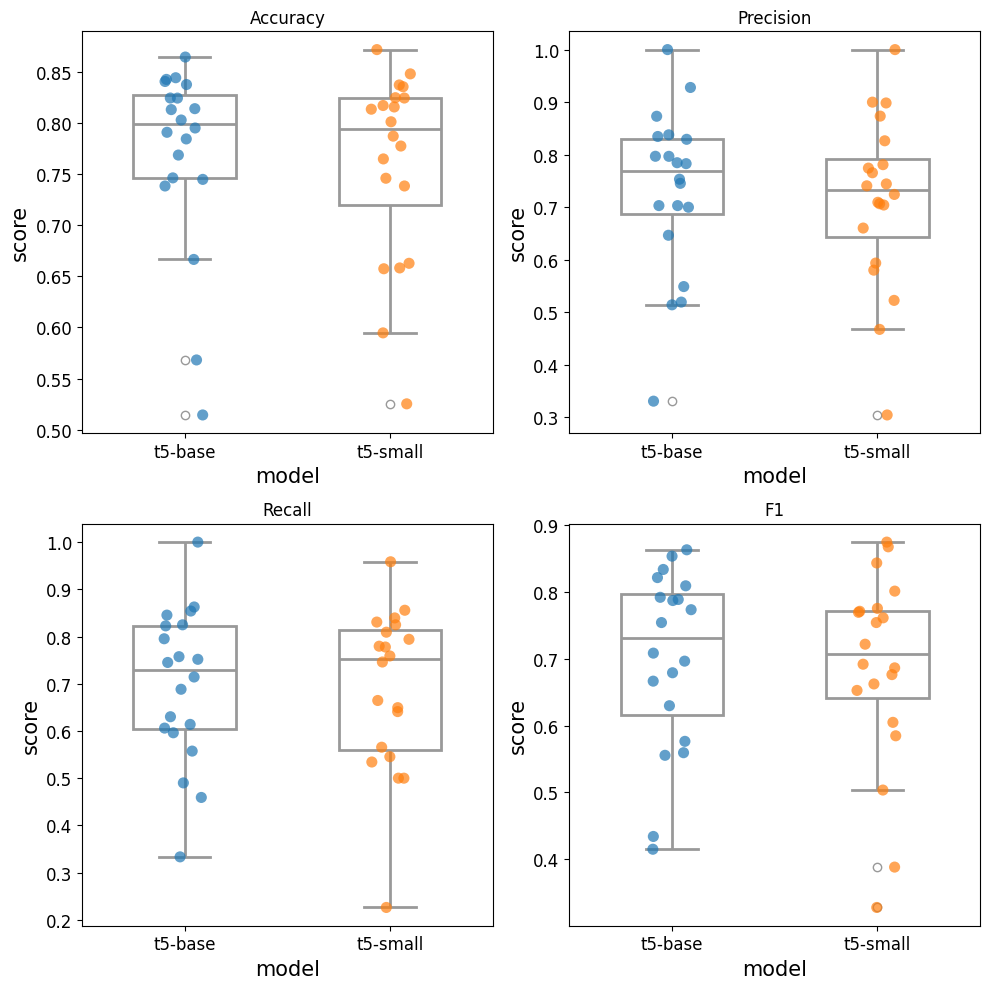

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

box_args = {
    'data': df,
    'x': 'model',
    'hue': 'model',
    'palette': df['model'].unique().size * ['white'],
    'linewidth': 2,
    'width': 0.5,
}

strip_args = {
    'data': df,
    'x': 'model',
    'hue': 'model',
    'size': 8,
    'palette': 'tab10'
}

for m, ax in zip(METRICS, axs.flatten()):
    sns.boxplot(**box_args, y=m, ax=ax, legend=False)
    sns.stripplot(**strip_args, y=m, ax=ax, alpha=0.7, legend=False)
    ax.set_title(m.capitalize())
    ax.set_ylabel('score', fontsize=15)
    ax.set_xlabel('model', fontsize=15)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

fig.tight_layout()
fig.savefig('../../out/img/small_v_base.pdf')

In [4]:
describe = df.groupby('model').describe(percentiles=[.5]).T
describe.drop(index=['count', 'min', 'max'], level=1, inplace=True)


def highlight_max(s):
    d = s.sort_values(ascending=False)

    style = {
        d.index[0]: 'textbf:--rwrap ;',   # max
    }

    return [style.get(v, '') for v in s.index]


describe.style.apply(highlight_max, axis=1).format('{:.3f}').format_index(escape='latex').to_latex(
    '../../out/tex/small_v_base.tex',
    hrules=True,
    caption='Metrics of T5-small and T5-base models trained with 4 weeks of prompt data. Bold values are the highest.', 
    label='tab:small_v_base', 
    clines='skip-last;data'
)

In [5]:
ranks = describe.rank(axis=1, method='min', ascending=False)

# Fixing the ranks of the std metrics (lower is better)
ranks[ranks.index.get_level_values(1) == 'std'] = ranks[ranks.index.get_level_values(
    1) == 'std'].rank(axis=1, method='min', ascending=False)

ranks.mean().sort_values()

model
t5-base     1.083333
t5-small    1.916667
dtype: float64

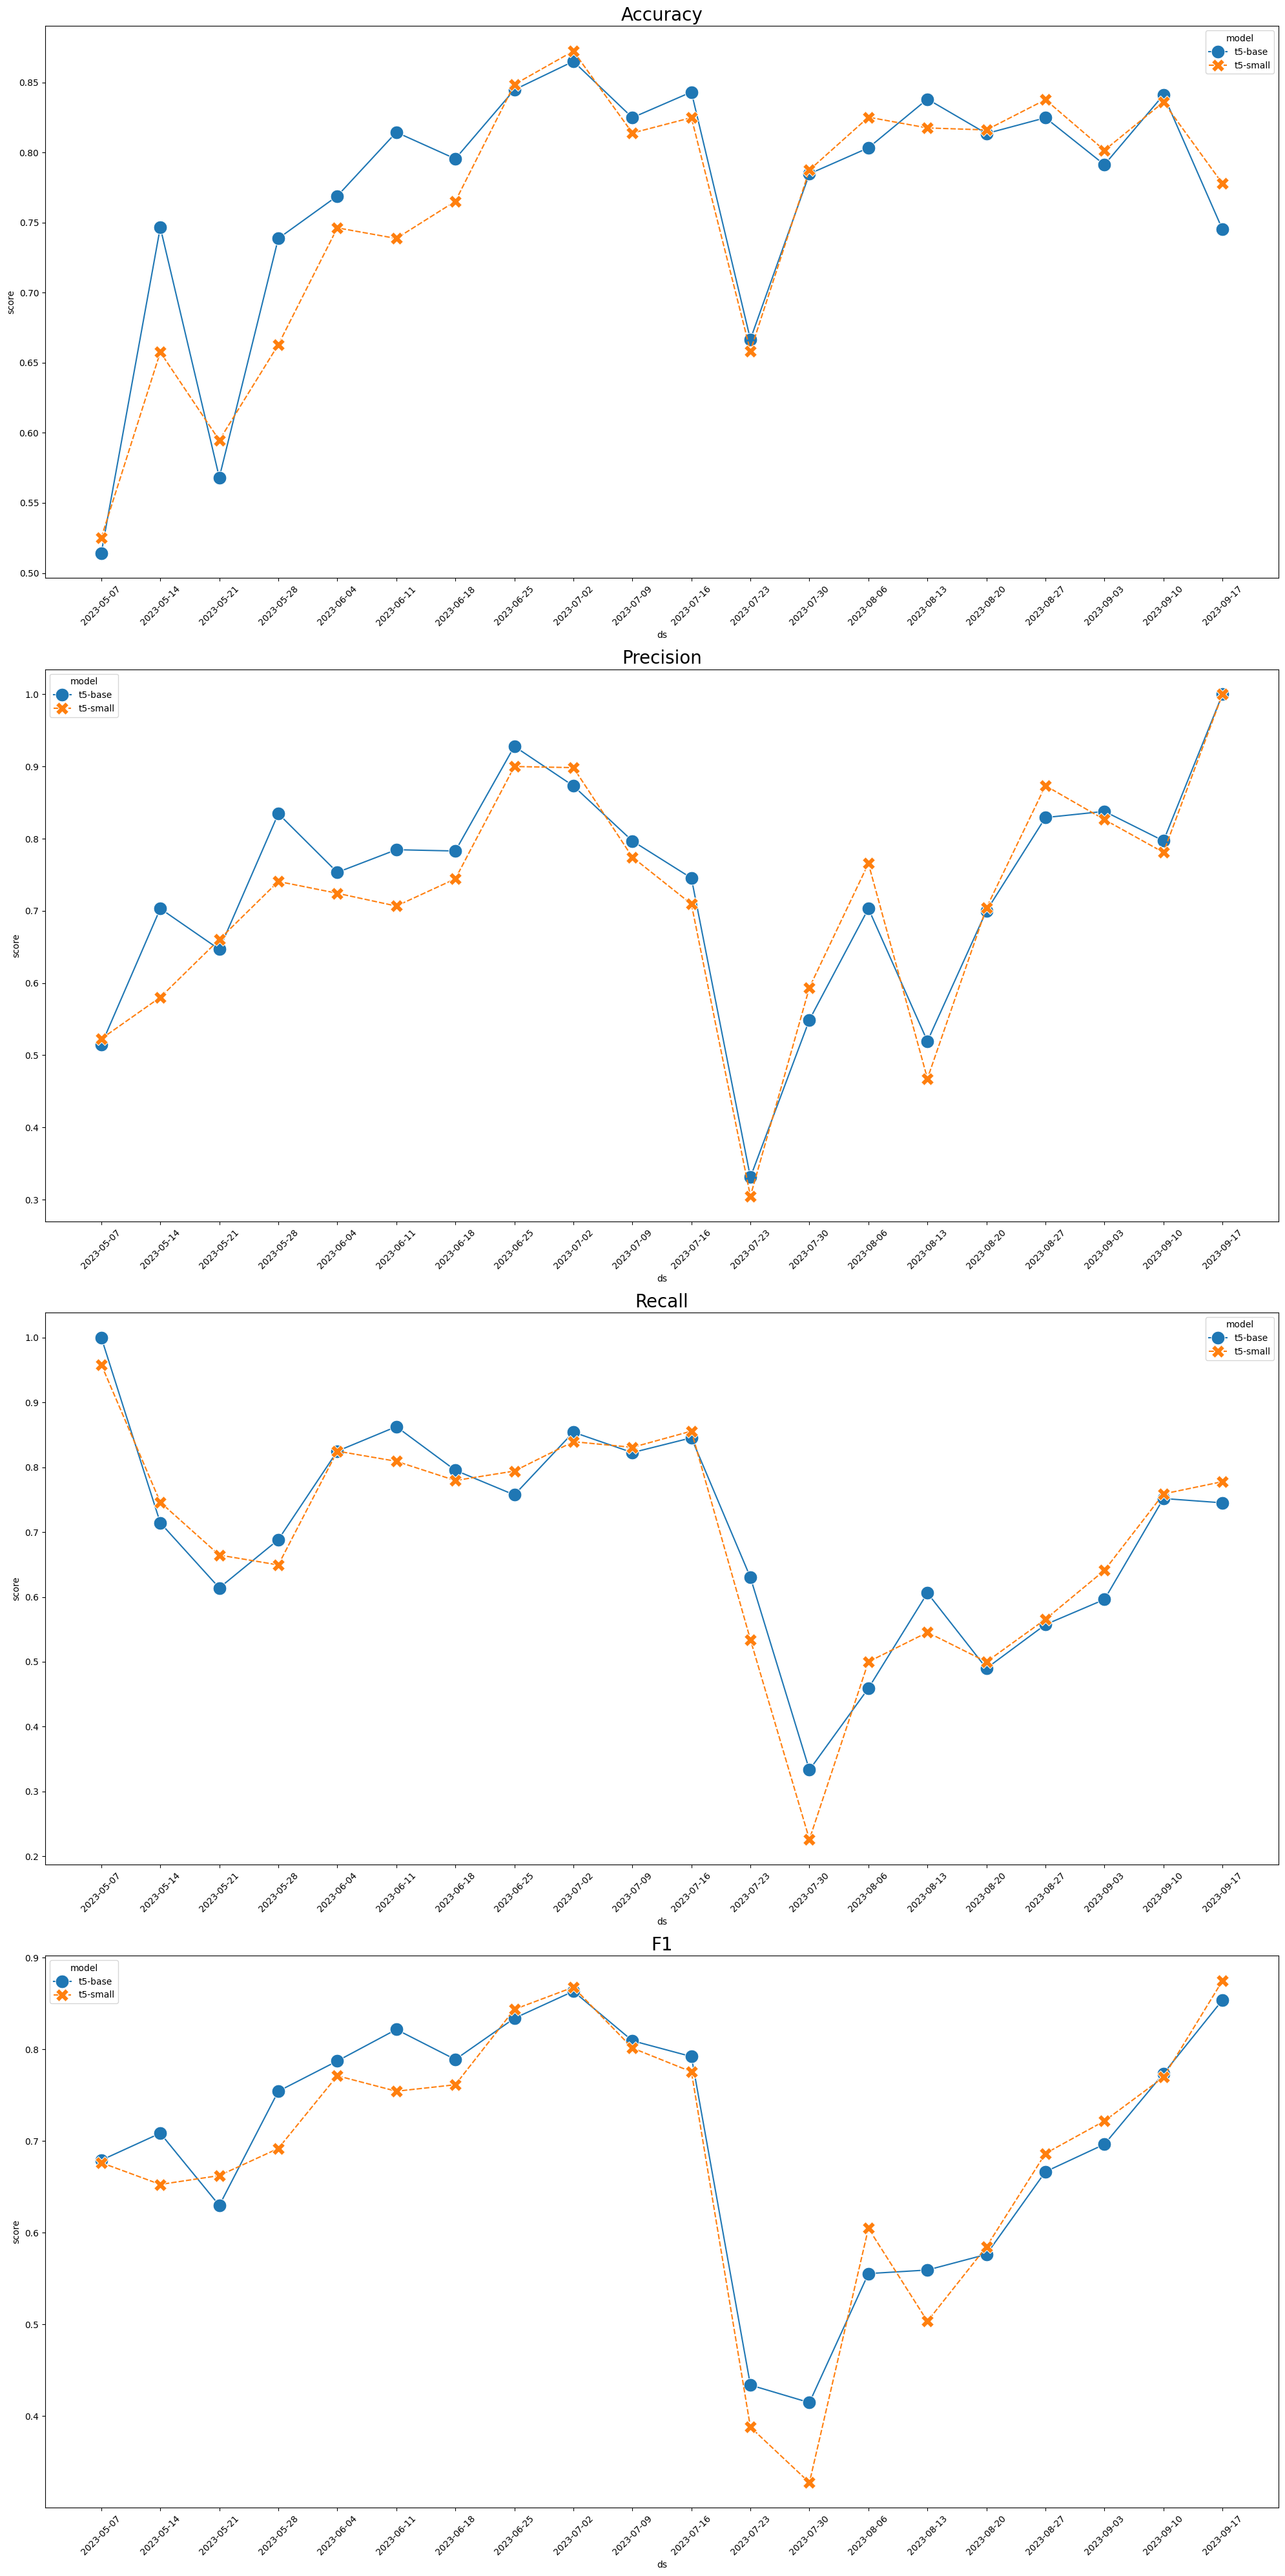

In [6]:
fig, axs = plt.subplots(4, 1, figsize=(20, 40))

for metric, ax in zip(['accuracy', 'precision', 'recall', 'f1'], axs.flatten()):
    sns.lineplot(data=df, x='ds', y=metric, hue='model', ax=ax, style='model',
                 markers=True, markersize=15, linewidth=1.5, palette='tab10')
    ax.set_title(metric.capitalize(), fontsize=20)
    ax.set_ylabel('score')
    ax.set_xticks(df['ds'].unique(), labels=df['ds'].unique(), rotation=45)

fig.tight_layout()